__**Table of Contents**__
====

>#### [3/1/2019](#3012019)
&emsp;   Continuation of defining dwarf locus.
>#### [3/7/2019](#3072019) + 3/8/2019
&emsp;   Continuation of defining dwarf locus.

<a id='3012019'></a>

3/1/2019
====

>### Still need to define the dwarf locus.  I will do this by finding the maximum "y" values (g-DDO51) for each corresponding "x" value (g-i).

In [51]:
#Load modules
from scipy import stats
import numpy as np

#Import counts
count = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\dred_ps_ddo51_counts.npy')

#Import x bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\xedgegigd200b.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\yedgegigd200b.npy')

>### I need the x and y coordinates for the centers of my bins.

In [52]:
#Removing last entry.  This will enable me to recenter the array values on the center of the bins.
x = xedge[0:200]
y = yedge[0:200]
np.info(x)

class:  ndarray
shape:  (200,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e7e817a350
byteorder:  little
byteswap:  False
type: float64


In [53]:
#Centering x and y values on center of bins
x = x + xedge[1] - xedge[0]
y = y + yedge[1] - yedge[0]

In [69]:
#Build up y values from maximum counts in each column
ymaxcount = np.max(count, axis=0)

yidx = np.array([],dtype=int)

for i in range(0,200):
    ycol = count[:,i]
    yidx = np.append(yidx,np.where(ycol==ymaxcount[i])[0][0])
    
len(yidx)

200

In [67]:
import matplotlib.pyplot as plt
%matplotlib nbagg

xcoord = x
ycoord = y[yidx]

plt.scatter(xcoord, ycoord)
plt.show()

ycoord

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size

In [19]:
np.where(ycol==ymaxcount[i])[0][0]

97

In [60]:
ymaxcount

array([7.9000e+01, 8.4000e+01, 8.8000e+01, 9.0000e+01, 9.6000e+01,
       1.0200e+02, 1.0800e+02, 1.2200e+02, 1.2200e+02, 1.4100e+02,
       1.5000e+02, 1.6400e+02, 1.7900e+02, 1.7900e+02, 2.0000e+02,
       2.1300e+02, 2.3500e+02, 2.2900e+02, 2.4200e+02, 2.5100e+02,
       2.8200e+02, 3.0100e+02, 3.0500e+02, 3.2400e+02, 3.6500e+02,
       3.7900e+02, 4.0400e+02, 3.9500e+02, 4.1700e+02, 4.7900e+02,
       5.0000e+02, 4.9700e+02, 5.0700e+02, 5.6700e+02, 6.1900e+02,
       6.3100e+02, 6.5000e+02, 6.9900e+02, 7.4100e+02, 8.0900e+02,
       8.8300e+02, 9.7800e+02, 1.0720e+03, 1.1380e+03, 1.2310e+03,
       1.3570e+03, 1.5080e+03, 1.7390e+03, 1.8850e+03, 2.0950e+03,
       2.3290e+03, 2.5910e+03, 3.0540e+03, 3.6260e+03, 4.3990e+03,
       5.4910e+03, 6.7510e+03, 7.7090e+03, 8.7070e+03, 9.4480e+03,
       1.0237e+04, 1.1072e+04, 1.2469e+04, 1.3737e+04, 1.4876e+04,
       1.5167e+04, 1.4751e+04, 1.3998e+04, 1.3116e+04, 1.2137e+04,
       1.1475e+04, 1.0538e+04, 9.9700e+03, 9.1250e+03, 8.6550e

<a id='3072019'></a>

3/7/2019
====

>### David indicated that my previous method should work for defining the dwarf locus.  I continue to define the locus below.

3/8/2019
====
>### Update: Issue was mainly with count array needing to be transposed

In [102]:
#Load modules
from scipy import stats
import numpy as np

#Import counts
count = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\dred_ps_ddo51_counts.npy')
count = count.T

#Import x bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\xedgegigd200b.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\yedgegigd200b.npy')

#Removing last entry.  This will enable me to recenter the array values on the center of the bins.
x = xedge[0:200]
y = yedge[0:200]

#Centering x and y values on center of bins
x = x + (xedge[1] - xedge[0])/2
y = y + (yedge[1] - yedge[0])/2

#Build up y values from maximum counts in each column
ymaxcount = np.array([],dtype=int)
for i in range(0,200):
    ycol = count[:,i]
    ymaxcount = np.append(ymaxcount,np.max(ycol))

yidx = np.array([],dtype=int)

for i in range(0,200):
    ycol = count[:,i]
    yt = np.where(count[:,i]==ymaxcount[i])
    yt = np.round(np.average(yt))
    yidx = np.array(np.append(yidx,yt),dtype=int)
        
len(yidx)

200

In [99]:
yt = [62,67]
yt = np.round(np.average(yt))
yt

64.0

In [40]:
ymaxcount[0]

6.0

<IPython.core.display.Javascript object>


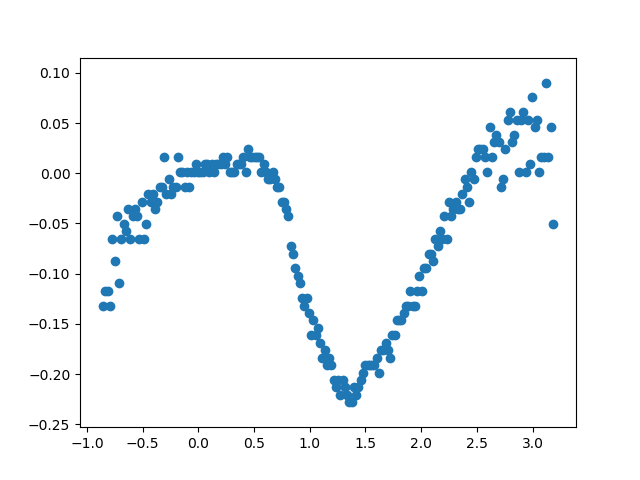

In [106]:
import matplotlib.pyplot as plt
%matplotlib nbagg

xcoord = x
ycoord = y[yidx]

plt.scatter(xcoord, ycoord)
#plt.xlim(-0.4,1.6)
#plt.ylim(-0.5,0.9)
plt.show()